# Testing construction of Trotterised brickwall cirucit

New implemented method vs Isabel's

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import jax

jax.config.update("jax_enable_x64", True)

In [ ]:
from ropt_aqc.initialise_hamiltonians import get_hamiltonian_terms, build_matrix_from_terms
num_sites = 6
degree = 2
n_id_layers = 0

Ising 1D

In [ ]:
# Ising-1d
J=1.
g=0.75
h=0.6
evolution_time = 2.0
n_repetitions = 5
system = 'ising-1d'

terms, params = get_hamiltonian_terms(num_qubits=num_sites, system=system, J=J, g=g, h=h)

J = params['J']
h = params['h']
g = params['g']

In [ ]:
# Isabel's code
from ropt_aqc.spin_systems import get_brickwall_trotter_gates_spin_chain
from ropt_aqc.circuit_building import transform_to_bw_qc_unitarygate

gates_bw = get_brickwall_trotter_gates_spin_chain(t=evolution_time, n_sites=num_sites, n_repetitions=n_repetitions, hamiltonian=system, degree=degree, J=J, g=g, h=h)

bw_qc = transform_to_bw_qc_unitarygate(num_sites=num_sites, system = system, gates=gates_bw, pauli_terms=terms)
depth_initial = bw_qc.depth()
bw_qc.draw('mpl')

In [ ]:
# my code
from ropt_aqc.trotterised_bw_cirucit import get_trotterised_gates, build_make_gate

make_gate_fn = build_make_gate(system, J=J, g=g, h=h)

gates_2 = get_trotterised_gates(evolution_time, num_sites, n_repetitions, degree, system, make_gate_fn=make_gate_fn, use_TN=False)
bw_qc_2 = transform_to_bw_qc_unitarygate(num_sites=num_sites, system = system, gates=gates_2, pauli_terms=terms)
depth_initial_2= bw_qc_2.depth()
bw_qc_2.draw('mpl')

In [ ]:
# similarity
from qiskit.quantum_info import Operator

U1 = Operator(bw_qc)
U2 = Operator(bw_qc_2)

same = U1.equiv(U2)  # returns True if unitaries are equivalent up to global phase
print(same)
same2 = bw_qc == bw_qc_2
print(same2)


Heisenberg

In [ ]:
# Heisenberg
t = 0.25
h = 0.75
system = 'heisenberg'

terms_h, params_h = get_hamiltonian_terms(num_qubits=num_sites, system=system, J=[1.0, 1.0, -0.5], h=[0.75, 0.0, 0.0])

J= params_h['J']
h= params_h['h']

In [ ]:
# Isabel's code
from ropt_aqc.spin_systems import get_brickwall_trotter_gates_spin_chain
from ropt_aqc.circuit_building import transform_to_bw_qc_unitarygate

gates_bw_h = get_brickwall_trotter_gates_spin_chain(t=evolution_time, n_sites=num_sites, n_repetitions=n_repetitions, hamiltonian=system, degree=degree, J=J, h=h)

bw_qc_h = transform_to_bw_qc_unitarygate(num_sites=num_sites, system = system, gates=gates_bw_h, pauli_terms=terms_h)
depth_h = bw_qc_h.depth()
bw_qc_h.draw('mpl')

In [ ]:
# my code
from ropt_aqc.trotterised_bw_cirucit import get_trotterised_gates, build_make_gate

make_gate_fn_h = build_make_gate(system, J=J, h=h)

gates_h_2 = get_trotterised_gates(evolution_time, num_sites, n_repetitions, degree, system, make_gate_fn=make_gate_fn_h, use_TN=False)
bw_qc_h_2 = transform_to_bw_qc_unitarygate(num_sites=num_sites, system = system, gates=gates_h_2, pauli_terms=terms_h)
depth_initial_h_2= bw_qc_h_2.depth()
bw_qc_h_2.draw('mpl')

In [ ]:
# similarity
from qiskit.quantum_info import Operator

U1 = Operator(bw_qc_h)
U2 = Operator(bw_qc_h_2)

same = U1.equiv(U2)  # returns True if unitaries are equivalent up to global phase
print(same)
same2 = bw_qc_h == bw_qc_h_2
print(same2)


Fermi hubbard 1D

In [1]:
system = 'fermi-hubbard-1d'
n_sites = 6
degree = 2
n_id_layers = 0
n_repetitions = 1
t = 0.3
n_orbitals = 2 * n_sites

In [2]:
import yaml
import os
# config
repo_root = "/Users/aag/Documents/ropt-aqc/"
config_path = os.path.join(repo_root, "run/fermi-hubbard-1d/configs/config.yml")

with open(config_path, "r") as f:
    config = yaml.safe_load(f)

config

{'hamiltonian': 'fermi-hubbard-1d',
 'n_sites': 6,
 'degree': 2,
 'n_repetitions': 1,
 'n_id_layers': 0,
 't': 0.3,
 'disordered': False,
 'load': False,
 'load_reference': True,
 'normalize_reference': True,
 'ref_nbr': 1,
 'lr': '1e-3',
 'n_iter': 100,
 'optimizer': 'ADAM',
 'max_bondim': 128}

In [3]:
from ropt_aqc.save_model import load_reference

config['reference_dir'] = f'/Users/aag/Documents/ropt-aqc/run/{system}/reference'

U_ref, t, _, _, _, _, _, _, _, T, V = load_reference(
                config['reference_dir'], int(config['n_sites']/2), config['n_repetitions'], config['t']) 

12
5


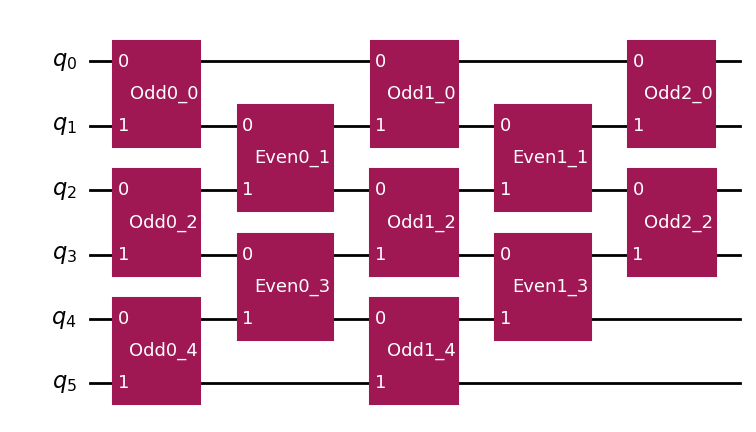

In [4]:
# Isabels code
from ropt_aqc.brickwall_circuit import get_initial_gates
from ropt_aqc.circuit_building import transform_to_bw_qc_unitarygate

Vlist_start_fh = get_initial_gates(n_sites, t, n_repetitions, degree, system, n_id_layers, use_TN=False, T=-T, V=-V)
print(len(Vlist_start_fh))
bw_qc_fh = transform_to_bw_qc_unitarygate(num_sites=n_sites, system = system, gates=Vlist_start_fh)
depth_initial_fh = bw_qc_fh.depth()
print(depth_initial_fh)
bw_qc_fh.draw('mpl')


Number of gates: 12


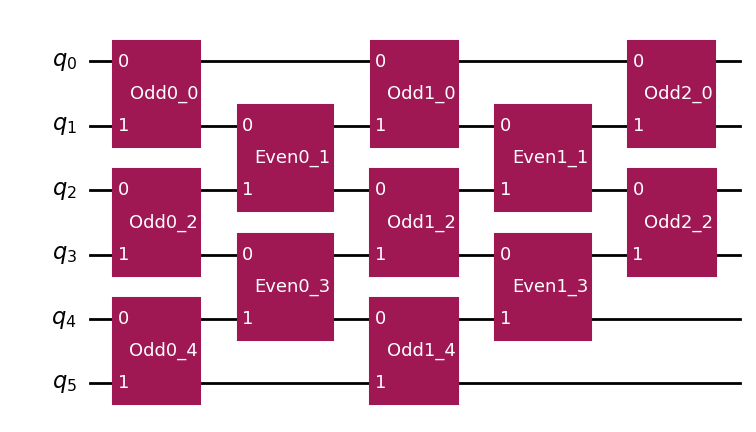

In [5]:
# my code
from ropt_aqc.trotterised_bw_cirucit import build_make_gate_fermionic, get_trotterised_gates


make_gate_fn = build_make_gate_fermionic(T, V)

gates_fh = get_trotterised_gates(t, n_sites, n_repetitions, degree, "fermionic", T=T, V=V, make_gate_fn=make_gate_fn, use_TN=False)
print(f"Number of gates: {len(gates_fh)}")

bw_qc_fh_2 = transform_to_bw_qc_unitarygate(num_sites=n_sites, system = system, gates=gates_fh)
depth_initial_fh_2 = bw_qc_fh_2.depth()
bw_qc_fh_2.draw('mpl')

In [6]:
# check gates
import numpy as np

def compare_gate_lists(gates1, gates2, atol=1e-8, up_to_phase=False):
    gates1 = np.asarray(gates1)
    gates2 = np.asarray(gates2)

    if gates1.shape != gates2.shape:
        print(f"Different shapes: {gates1.shape} vs {gates2.shape}")
        return False

    n_gates = len(gates1)
    all_close = True

    for idx in range(n_gates):
        g1 = gates1[idx]
        g2 = gates2[idx]

        if up_to_phase:
            phase = np.vdot(g1.flatten(), g2.flatten()) / np.vdot(g1.flatten(), g1.flatten())
            g1_phase_corrected = g1 * np.conj(phase)
            if not np.allclose(g1_phase_corrected, g2, atol=atol):
                print(f"Gate {idx} differs (up to phase).")
                all_close = False
        else:
            if not np.allclose(g1, g2, atol=atol):
                print(f"Gate {idx} differs.")
                all_close = False

    if all_close:
        print("✅ All gates match.")
    else:
        print("❌ Some gates differ.")
    return all_close

compare_gate_lists(Vlist_start_fh, gates_fh, up_to_phase=True)


Gate 0 differs (up to phase).
Gate 1 differs (up to phase).
Gate 2 differs (up to phase).
Gate 3 differs (up to phase).
Gate 4 differs (up to phase).
Gate 7 differs (up to phase).
Gate 8 differs (up to phase).
Gate 9 differs (up to phase).
Gate 10 differs (up to phase).
Gate 11 differs (up to phase).
❌ Some gates differ.


False

In [7]:
# similarity
from qiskit.quantum_info import Operator

U1 = Operator(bw_qc_fh)
U2 = Operator(bw_qc_fh_2)

same = U1.equiv(U2)  # returns True if unitaries are equivalent up to global phase
print(same)
same2 = bw_qc_fh == bw_qc_fh_2
print(same2)


False
False


# Testing gate qubit remapping

In [1]:
import jax.numpy as jnp
import numpy as np

def make_swap_gate_44():
    return jnp.array([
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 1]
    ])


def make_swap_gate_2222():
    gate = jnp.zeros((2,2,2,2))
    gate = gate.at[0,0,0,0].set(1)
    gate = gate.at[0,1,1,0].set(1)
    gate = gate.at[1,0,0,1].set(1)
    gate = gate.at[1,1,1,1].set(1)
    return gate

def is_swap_gate_44(g):
    expected = make_swap_gate_44()
    return jnp.allclose(g, expected)

def is_swap_gate_2222(g):
    expected = make_swap_gate_2222()
    return jnp.allclose(g, expected)


In [2]:
# test get_qubit_mapping
from ropt_aqc.circuit_building import get_qubit_mapping

def test_get_qubit_mapping():
    n = 4
    expected_mirror = {0: 3, 1: 2, 2: 1, 3: 0}
    expected_identity = {0: 0, 1: 1, 2: 2, 3: 3}

    assert get_qubit_mapping(n, 'top-to-bottom') == expected_identity
    assert get_qubit_mapping(n, 'right-to-left') == expected_identity
    assert get_qubit_mapping(n, 'bottom-to-top') == expected_mirror
    assert get_qubit_mapping(n, 'left-to-right') == expected_mirror

    print("✅ test_get_qubit_mapping passed.")

test_get_qubit_mapping()


✅ test_get_qubit_mapping passed.


In [13]:
from ropt_aqc.circuit_building import remap_gate_qubits, remap_brickwall_gates

def test_remap_gate_qubits_swap_behavior():
    # 4x4 swap
    original = make_swap_gate_44()
    flipped = remap_gate_qubits(original, orig_pair=(0, 1), new_pair=(1, 0))
    assert is_swap_gate_44(flipped)

    # 2x2x2x2 swap
    original_tn = make_swap_gate_2222()
    flipped_tn = remap_gate_qubits(original_tn, orig_pair=(0, 1), new_pair=(1, 0))
    assert is_swap_gate_2222(flipped_tn)

    print("✅ test_remap_gate_qubits_swap_behavior passed.")

test_remap_gate_qubits_swap_behavior()

def test_remap_gate_qubits():
    G = make_swap_gate_44()

    # Case 1: no change in order
    G1 = remap_gate_qubits(G, (0,1), (0,1))
    assert jnp.allclose(G, G1), "Gate should be unchanged"

    # Case 2: swap needed
    G2 = remap_gate_qubits(G, (0,1), (1,0))
    perm = jnp.array([0,2,1,3])
    G_expected = G[jnp.ix_(perm, perm)]
    assert jnp.allclose(G2, G_expected), "Gate should be swapped internally"

    print("✅ remap_gate_qubits tests passed.")

test_remap_gate_qubits()


✅ test_remap_gate_qubits_swap_behavior passed.
✅ remap_gate_qubits tests passed.


In [14]:
import jax.numpy as jnp

def make_asymmetric_gate_44():
    return jnp.array([
        [1, 0, 0, 0],
        [0, 1j, 0, 0],
        [0, 0, -1, 0],
        [0, 0, 0, 1]
    ])

n_sites = 4
gates = jnp.stack([make_asymmetric_gate_44() for _ in range(4)])
labels = [f"G{i}" for i in range(len(gates))]

def test_remap_brickwall():
    remapped = remap_brickwall_gates(gates, labels, n_sites, qubit_direction='left-to-right')
    
    # Print results
    print("Original gate order (top-to-bottom):")
    for idx, g in enumerate(gates):
        print(f"Gate {idx}:\n", g)
    
    print("\nRemapped gate order (left-to-right):")
    for idx, g in enumerate(remapped):
        print(f"Gate {idx}:\n", g)

test_remap_brickwall()

Original gate order (top-to-bottom):
Gate 0:
 [[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]]
Gate 1:
 [[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]]
Gate 2:
 [[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]]
Gate 3:
 [[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]]

Remapped gate order (left-to-right):
Gate 0:
 ('G1', Array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+1.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j]], dtype=complex64))
Gate 1:
 ('G0', Array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
    

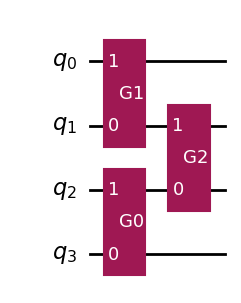

In [15]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Operator
import jax.numpy as jnp
from qiskit.circuit.library import UnitaryGate

# Build left-to-right layout using reverse wire ordering
def build_logical_left_to_right_circuit(n_sites, gates):
    qreg = QuantumRegister(n_sites, "q")
    qc = QuantumCircuit(qreg)
    wire_order = list(reversed(qreg))  # left-to-right

    g_idx = 0
    for i in range(0, n_sites - 1, 2):
        if g_idx >= len(gates): break
        qc.append(UnitaryGate(np.array(gates[g_idx]), label=f"G{g_idx}"), [wire_order[i], wire_order[i + 1]])
        g_idx += 1
    for i in range(1, n_sites - 1, 2):
        if g_idx >= len(gates): break
        qc.append(UnitaryGate(np.array(gates[g_idx]), label=f"G{g_idx}"), [wire_order[i], wire_order[i + 1]])
        g_idx += 1
    return qc


gates = jnp.stack([make_asymmetric_gate_44() for _ in range(4)])

    # Step 2: Build original circuit (no remap, assuming left-to-right layout)
circuit_original = build_logical_left_to_right_circuit(4, gates)
circuit_original.draw('mpl')

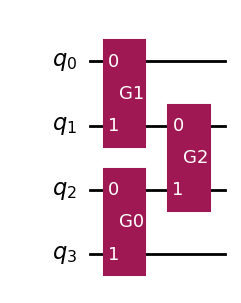

In [16]:
from ropt_aqc.circuit_building import transform_to_bw_qc_unitarygate
labels = [f"G{i}" for i in range(len(gates))]

remapped = remap_brickwall_gates(gates, labels, n_sites)

# Unzip into two lists
remapped_labels, remapped_gates = zip(*remapped)

# Then pass both to your circuit builder
remapped_circuit = transform_to_bw_qc_unitarygate(
    n_sites,
    jnp.stack(remapped_gates),
    labels=list(remapped_labels)
)

remapped_circuit.draw('mpl')

In [17]:
n_sites = 4
gates = jnp.stack([make_asymmetric_gate_44() for _ in range(4)])
labels = [f"G{i}" for i in range(len(gates))]

# Original circuit (left-to-right logic, reversed wire order)
circuit_original = build_logical_left_to_right_circuit(n_sites, gates)

# Remapped circuit (top-to-bottom Qiskit layout)
labels = [f"G{i}" for i in range(len(gates))]

# Returns: List of (label, remapped_gate)
remapped = remap_brickwall_gates(gates, labels, n_sites)

# Unzip into two lists
remapped_labels, remapped_gates = zip(*remapped)

# Then pass both to your circuit builder
remapped_circuit = transform_to_bw_qc_unitarygate(
    n_sites,
    jnp.stack(remapped_gates),
    labels=list(remapped_labels)
)

# Compare full matrices
U_orig = Operator(circuit_original).data
U_remap = Operator(remapped_circuit).data

assert jnp.allclose(U_orig, U_remap, atol=1e-6)
print("✅ Circuits are functionally equivalent (unitary match).")

# Optional: show both circuits side-by-side
print("\nOriginal:")
print(circuit_original.draw(fold=-1))

print("\nRemapped:")
print(remapped_circuit.draw(fold=-1))


✅ Circuits are functionally equivalent (unitary match).

Original:
     ┌─────┐       
q_0: ┤1    ├───────
     │  G1 │┌─────┐
q_1: ┤0    ├┤1    ├
     ├─────┤│  G2 │
q_2: ┤1    ├┤0    ├
     │  G0 │└─────┘
q_3: ┤0    ├───────
     └─────┘       

Remapped:
     ┌─────┐       
q_0: ┤0    ├───────
     │  G1 │┌─────┐
q_1: ┤1    ├┤0    ├
     ├─────┤│  G2 │
q_2: ┤0    ├┤1    ├
     │  G0 │└─────┘
q_3: ┤1    ├───────
     └─────┘       


In [11]:
import numpy as np

def make_swap_gate_44():
    return np.array([
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 1]
    ], dtype=complex)

def remap_gate_qubits(gate: np.ndarray, orig_pair: tuple, new_pair: tuple) -> np.ndarray:
    orig_dir = orig_pair[0] < orig_pair[1]
    new_dir = new_pair[0] < new_pair[1]
    swap = orig_dir != new_dir

    if gate.shape != (4, 4):
        raise ValueError("Gate must be 4x4")
    
    if not swap:
        return gate
    else:
        perm = [0, 2, 1, 3]  # binary index: 00, 01, 10, 11
        return gate[np.ix_(perm, perm)]

# Test it
original = make_swap_gate_44()
remapped = remap_gate_qubits(original, orig_pair=(0, 1), new_pair=(1, 0))

# Validate unitarity and check if it's still a SWAP
is_unitary = np.allclose(remapped.conj().T @ remapped, np.eye(4), atol=1e-8)
is_swap = np.allclose(remapped, original)

print("✅ Is unitary:", is_unitary)
print("✅ Remapped is still SWAP:", is_swap)


✅ Is unitary: True
✅ Remapped is still SWAP: True
